In [7]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import csv
import pandas as pd

dataset = pd.read_csv('datasets/pokemon.csv')
display(dataset.columns)

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [9]:
from sklearn.cluster import KMeans

stats = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']
X = dataset[stats]
n_clusters = 4
km = KMeans(n_clusters=n_clusters)
km.fit(X)


KMeans(n_clusters=4)

In [35]:
groups = []

for k in range(n_clusters):
    groups.append(dataset.iloc[km.labels_ == k])


In [41]:
pd.set_option('display.max_rows', 1000)
i = 0
base_stats = []
for g in groups:
    g = g.sort_values('base_total')
    display(g[['name', 'base_total', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']])

,name,base_total,hp,attack,defense,sp_attack,sp_defense,speed
409,Shieldon,350,30,42,118,42,88,30
563,Tirtouga,355,54,78,103,53,45,22
298,Nosepass,375,30,45,135,45,90,30
540,Swadloon,380,55,63,90,50,80,42
94,Onix,385,35,45,160,30,45,70
524,Boldore,390,70,105,105,50,40,20
74,Graveler,390,55,95,115,45,45,35
736,Charjabug,400,57,82,95,55,75,36
789,Cosmoem,400,43,29,131,29,131,37
532,Gurdurr,405,85,105,85,40,50,40


,name,base_total,hp,attack,defense,sp_attack,sp_defense,speed
661,Fletchinder,382,62,73,55,56,52,84
401,Kricketune,384,77,85,51,55,51,65
535,Palpitoad,384,75,65,55,65,55,69
748,Mudbray,385,70,100,70,45,55,45
60,Poliwhirl,385,65,65,65,50,50,90
445,Munchlax,390,135,85,40,40,85,5
165,Ledian,390,55,35,50,55,110,85
69,Weepinbell,390,65,90,50,85,45,55
574,Gothorita,390,60,45,70,75,85,55
192,Yanma,390,65,65,45,75,45,95


,name,base_total,hp,attack,defense,sp_attack,sp_defense,speed
779,Drampa,485,78,60,85,135,91,36
605,Beheeyem,485,75,75,75,125,95,40
737,Vikavolt,500,77,70,90,145,75,43
692,Clawitzer,500,71,73,88,120,89,59
570,Zoroark,510,60,105,60,120,60,105
406,Roserade,515,60,70,65,125,105,90
603,Eelektross,515,85,115,80,105,80,50
232,Porygon2,515,85,80,90,105,95,60
478,Rotom,520,50,65,107,105,107,86
608,Chandelure,520,60,55,90,145,90,80


,name,base_total,hp,attack,defense,sp_attack,sp_defense,speed
190,Sunkern,180,30,30,30,30,30,30
297,Azurill,190,50,20,40,20,40,20
400,Kricketot,194,37,25,41,25,41,25
264,Wurmple,195,45,45,35,20,30,20
9,Caterpie,195,45,30,35,20,20,45
12,Weedle,195,40,35,30,20,20,50
279,Ralts,198,28,25,25,45,35,40
348,Feebas,200,20,15,20,10,55,80
128,Magikarp,200,20,10,55,15,20,80
663,Scatterbug,200,38,35,40,27,25,35


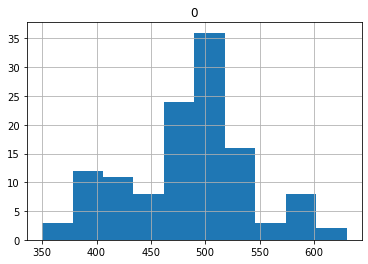

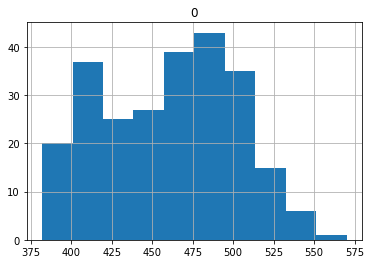

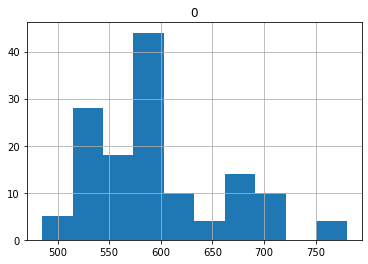

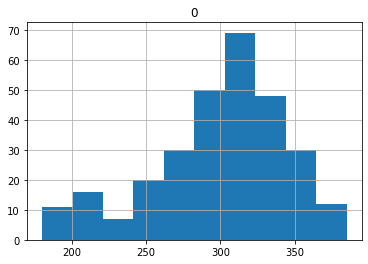

In [24]:
for base in base_stats:
    df = pd.DataFrame(base)
    df.hist()

In [33]:
dataset.iloc[km.labels_ == 1]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.50,2.0,2.00,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.00,0.5,1.00,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
7,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.00,0.5,1.00,1.0,...,88.1,8,65,80,58,water,NaN,22.5,1,0
11,"['Compoundeyes', 'Tinted Lens']",0.50,1.0,1.0,2.0,1.0,0.25,2.0,2.00,1.0,...,50.0,12,90,80,70,bug,flying,32.0,1,0
14,"['Swarm', 'Sniper']",0.50,1.0,1.0,1.0,0.5,0.25,2.0,2.00,1.0,...,50.0,15,15,80,145,bug,poison,29.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,"['Iron Barbs', 'Lightningrod', 'Sturdy']",0.50,1.0,0.5,0.5,0.5,2.00,2.0,0.25,1.0,...,50.0,777,40,73,96,electric,steel,3.3,7,0
777,['Disguise'],0.25,1.0,0.0,1.0,1.0,0.00,1.0,1.00,2.0,...,50.0,778,50,105,96,ghost,fairy,0.7,7,0
778,"['Dazzling', 'Strong Jaw', 'Wonder Skin ']",2.00,2.0,1.0,2.0,1.0,0.50,0.5,1.00,2.0,...,50.0,779,70,70,92,water,psychic,19.0,7,0
782,"['Bulletproof', 'Soundproof', 'Overcoat']",0.50,0.5,2.0,0.5,4.0,1.00,0.5,2.00,1.0,...,50.0,783,65,70,65,dragon,fighting,47.0,7,0
